In [1]:
import sys
sys.path.append('..')  # 添加上级目录到搜索路径
from utils import *

In [2]:
N = 5000
M = 5*N
m = 5

# 设定移除节点比例
l = 4
# 设定移除节点比例
q = [1- 1./2**i for i in range(l)]
print(q)

[0.0, 0.5, 0.75, 0.875]


In [ ]:
beta_range = np.logspace(-3, 3, 200)
nom_Z_tau1 = np.zeros((len(beta_range), l))
nom_Z_tau2 = np.zeros((len(beta_range), l))
samples = 10
for i in range(samples):
    print("=========")
    G1 = nx.gnm_random_graph(N, M)
    DC_plus1 = cal_DC_plus(G1)
    sequence_DC_plus1 = dict(sorted(DC_plus1.items(), key=lambda x: x[1], reverse=False))

    nom_Z_tau_i1 = cal_Z_tau_synthetic(G1, sequence_DC_plus1, N, q, beta_range)
    nom_Z_tau1 += np.array(nom_Z_tau_i1).T


    G2 = nx.barabasi_albert_graph(N, m)
    DC_plus2 = cal_DC_plus(G2)
    sequence_DC_plus2 = dict(sorted(DC_plus2.items(), key=lambda x: x[1], reverse=False))

    nom_Z_tau_i2 = cal_Z_tau_synthetic(G2, sequence_DC_plus2, N, q, beta_range)
    nom_Z_tau2 += np.array(nom_Z_tau_i2).T

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


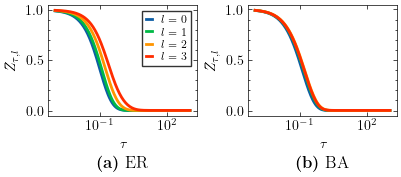

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(4, 1.75), constrained_layout=True)
ax = axs[0]
ax.plot(beta_range, nom_Z_tau1[:, 0]/samples, linewidth = 2.0, clip_on=False, label="$l =$ "+str(0))
ax.plot(beta_range, nom_Z_tau1[:, 1]/samples, linewidth = 2.0, clip_on=False, label="$l =$ "+str(1))
ax.plot(beta_range, nom_Z_tau1[:, 2]/samples, linewidth = 2.0, clip_on=False, label="$l =$ "+str(2))
ax.plot(beta_range, nom_Z_tau1[:, 3]/samples, linewidth = 2.0, clip_on=False, label="$l =$ "+str(3))
ax.legend(loc=1, edgecolor = "black", fontsize=8, labelspacing=0.2, handlelength=0.5, frameon=True, fancybox=False) 
ax.set_ylabel(r"$\bar Z_{\tau, l}$")
ax.set_xlabel(r"$\tau$")
ax.set_xscale("log")
ax.set_title(r"\textbf{(a)} ER", loc='center', y=-0.55, fontsize=12)


ax = axs[1]
ax.plot(beta_range, nom_Z_tau2[:, 0]/samples, linewidth = 2.0, clip_on=False, label="$l =$ "+str(0))
ax.plot(beta_range, nom_Z_tau2[:, 1]/samples, linewidth = 2.0, clip_on=False, label="$l =$ "+str(1))
ax.plot(beta_range, nom_Z_tau2[:, 2]/samples, linewidth = 2.0, clip_on=False, label="$l =$ "+str(2))
ax.plot(beta_range, nom_Z_tau2[:, 3]/samples, linewidth = 2.0, clip_on=False, label="$l =$ "+str(3))
ax.set_ylabel(r"$\bar Z_{\tau, l}$")
ax.set_xlabel(r"$\tau$")
ax.set_xscale("log")
ax.set_title(r"\textbf{(b)} BA", loc='center', y=-0.55, fontsize=12)

plt.savefig("Fig7_ER_BA_nom_partition_function_DC_plus.pdf")
plt.show()